In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import json
for dirname, _, filenames in os.walk('/kaggle/input'): # folder in kaggle #from google.colab import drive; drive.mount('/content/drive')
    for filename in filenames:
        print(os.path.join(dirname, filename)) # printing paths of files
# json = javascript file; like dictionaries

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json
/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json


In [4]:
path1 = '/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json'
path2 = '/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json'
#stores info into dataframe
def read_json_file(filepath):
    return pd.DataFrame.from_dict([json.loads(line) for line in open(filepath, 'r')])
# json.loads(line) for line in open(filepath, 'r') -- reads the files; loads the lines
# from_dict make dataframe

df = pd.concat([read_json_file(path1), read_json_file(path2)])
# df = data frame
# concat the datasets; merging them together

In [5]:
df.info()
# df info out
# 55328 rows
# is_sarcastic -- 0 (not) or 1 (is sarcastic)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 55328 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  55328 non-null  object
 1   headline      55328 non-null  object
 2   is_sarcastic  55328 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [6]:
df.isnull().sum()
# checks how many N/A (AKA null) values

article_link    0
headline        0
is_sarcastic    0
dtype: int64

In [7]:
df.head()

# shows the first x rows of the df

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [8]:
maxlen = 100 #max len
training_samples = 200
validation_samples = 10000
max_words = 10000
# care more abt the testing process

embedding_dim = 100
# embeds the word into a vector space for NN (b/c computers can understand #s)

# hyperparameters for training
batch_size = 200
epochs = 20

In [16]:
from keras.preprocessing.text import Tokenizer
# does a bunch of things (i.e.changes words to vectors)
# first learns the dictionary and then making the vectors
# makes a dic where each word has a # for it

from keras.preprocessing.sequence import pad_sequences
# similar length with maxlen

# making sentences into #s so comp can understand

tokenizer = Tokenizer(num_words = max_words)
#inst. of class

tokenizer.fit_on_texts(list(df['headline']))
#creates a dict. w/ the words

sequences = tokenizer.texts_to_sequences(list(df['headline']))
#makes vectors/arrays using headline words

word_index = tokenizer.word_index
print('There are %s unique tokens.' %len(word_index))


X = tokenizer.texts_to_sequences(df['headline'])
#same notations of x&y; takes the headlines and makes vectors

X = pad_sequences(X, maxlen = maxlen)
#want all of the vectors to have teh same length
# equal sizes

y = df['is_sarcastic']
# sarcastic or not
#output var = usually in y
#input = usually in X

There are 30884 unique tokens.


In [18]:
y

0        0
1        0
2        1
3        1
4        0
        ..
28614    1
28615    1
28616    0
28617    1
28618    1
Name: is_sarcastic, Length: 55328, dtype: int64

In [10]:
#creating a model

from keras.layers import Dense, Input, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras import layers

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length = maxlen))

model.add(Flatten()) #matrix -- changes it to vectors
model.add(Dense(100, activation="relu")) #dense layor; max=100
model.add(Dropout(0.3))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.3)) # try using diff values (0.1-0.9) and see which one give less errors
model.add(Dense(1, activation="sigmoid")) #binary classification --> last layer - sigmoid
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
# review week2 slides

es = EarlyStopping(monitor="val_acc", mode="max", patience=3) #es = if after 3 epoch, VA didn't get better -- stop training
history = model.fit(X, y, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks=[es])

Epoch 1/20
222/222 [==============================] - 6s 27ms/step - loss: 0.4510 - accuracy: 0.7721 - val_loss: 0.2264 - val_accuracy: 0.9122
Epoch 2/20
222/222 [==============================] - 5s 24ms/step - loss: 0.1514 - accuracy: 0.9495 - val_loss: 0.1005 - val_accuracy: 0.9662
Epoch 3/20
222/222 [==============================] - 5s 25ms/step - loss: 0.0439 - accuracy: 0.9872 - val_loss: 0.0606 - val_accuracy: 0.9837
Epoch 4/20
222/222 [==============================] - 5s 24ms/step - loss: 0.0126 - accuracy: 0.9966 - val_loss: 0.0550 - val_accuracy: 0.9888
Epoch 5/20
222/222 [==============================] - 6s 25ms/step - loss: 0.0047 - accuracy: 0.9988 - val_loss: 0.0669 - val_accuracy: 0.9879
Epoch 6/20
222/222 [==============================] - 5s 25ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.0719 - val_accuracy: 0.9892
Epoch 7/20
222/222 [==============================] - 6s 27ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.0847 - val_accuracy: 0.9882

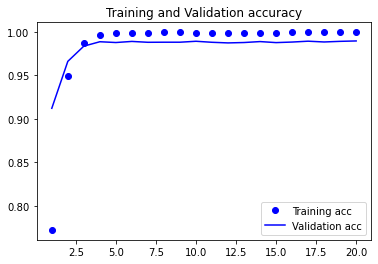

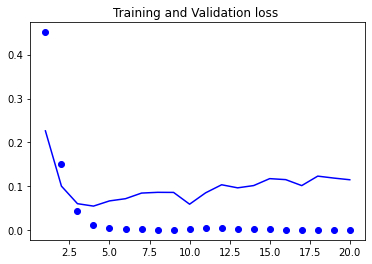

In [11]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss ')
plt.show()

#gap btwn training loss & val loss = overfitting